In [166]:
import pandas as pd
import numpy as np
import seaborn as sns   
from sklearn.feature_selection import VarianceThreshold ,SelectKBest ,f_regression
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate 

In [167]:
df=pd.read_csv('/Users/ayush/Desktop/ML2024/Datasets/heart.csv')

In [168]:
df.shape

(1025, 14)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: xlabel='target', ylabel='count'>

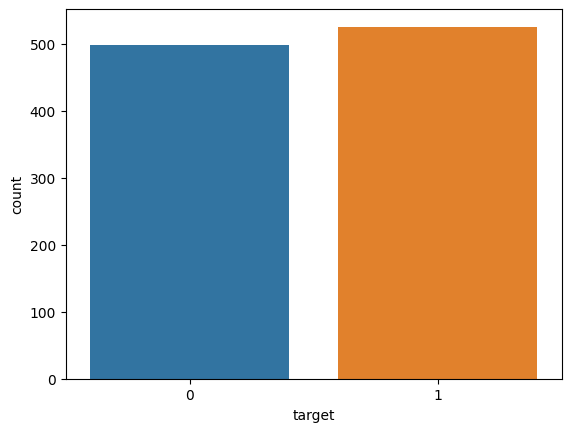

In [170]:
sns.countplot(data=df,x='target')

In [171]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFECV
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder ,StandardScaler
from sklearn.pipeline import Pipeline

In [172]:

np.set_printoptions(precision=2, suppress=True)

In [173]:
X=df.drop('target',axis=1)
y=df['target']

In [174]:
selector1=SelectKBest(chi2,k=6)
selector1.fit_transform(X,y)
for c,s in zip(X.columns, selector1.scores_):
    print(f'{c:25}: {s:.2f}')
print(selector1.get_feature_names_out().tolist())

age                      : 81.43
sex                      : 24.37
cp                       : 217.82
trestbps                 : 45.97
chol                     : 110.72
fbs                      : 1.48
restecg                  : 9.74
thalach                  : 650.01
exang                    : 130.47
oldpeak                  : 253.65
slope                    : 33.67
ca                       : 210.63
thal                     : 19.37
['cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca']


In [175]:
selector2=SelectKBest(f_classif,k=6)
selector2.fit_transform(X,y)
for c,s in zip(X.columns, selector2.scores_):
    print(f'{c:25}: {s:.2f}')
(selector2.get_feature_names_out().tolist())

age                      : 56.79
sex                      : 86.69
cp                       : 238.56
trestbps                 : 20.09
chol                     : 10.33
fbs                      : 1.74
restecg                  : 18.84
thalach                  : 222.80
exang                    : 242.88
oldpeak                  : 243.45
slope                    : 138.68
ca                       : 174.88
thal                     : 131.80


['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

In [176]:
selector3=SelectKBest(mutual_info_classif,k=6)
selector3.fit_transform(X,y)
for c,s in zip(X.columns, selector3.scores_):
    print(f'{c:25}: {s:.2f}')
print(selector3.get_feature_names_out().tolist())

age                      : 0.07
sex                      : 0.03
cp                       : 0.15
trestbps                 : 0.08
chol                     : 0.27
fbs                      : 0.00
restecg                  : 0.02
thalach                  : 0.15
exang                    : 0.10
oldpeak                  : 0.15
slope                    : 0.11
ca                       : 0.12
thal                     : 0.15
['cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


In [177]:
selector_4 = RFECV(ExtraTreeClassifier(), cv=5)
selector_4.fit(X, y)
for c,s in zip(X.columns, selector_4.ranking_):
    print(f'{c:25}: {s}')
print(selector_4.get_support(indices=True))
print(X.columns[selector_4.get_support()].tolist())

age                      : 1
sex                      : 1
cp                       : 1
trestbps                 : 1
chol                     : 1
fbs                      : 2
restecg                  : 1
thalach                  : 1
exang                    : 1
oldpeak                  : 1
slope                    : 1
ca                       : 1
thal                     : 1
[ 0  1  2  3  4  6  7  8  9 10 11 12]
['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [178]:
from sklearn.ensemble import  RandomForestClassifier

In [179]:
X1 = df[['cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca']]
y1 = df['target']

In [180]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X1,y1,test_size=0.2)

In [181]:
model=Pipeline(steps=[
     ('StandardScaler',StandardScaler()),
    ('RandomForestClassifier',RandomForestClassifier(criterion='log_loss',max_depth=5)),
   
])


In [182]:
model.fit(Xtrain,Ytrain)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('RandomForestClassifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=5))])

In [183]:
y_pred = model.predict(Xtest)

# Metrics
accuracy = accuracy_score(Ytest, y_pred)
precision = precision_score(Ytest, y_pred, )
recall = recall_score(Ytest, y_pred )
f1 = f1_score(Ytest, y_pred, )

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9073170731707317
Precision: 0.8833333333333333
Recall: 0.954954954954955
F1 Score: 0.9177489177489178


In [184]:
cv_results = cross_validate(model, X1, y1, cv=5, 
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                            return_train_score=False)

print(f"Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Precision Scores: {cv_results['test_precision_weighted']}")
print(f"Recall Scores: {cv_results['test_recall_weighted']}")
print(f"F1 Scores: {cv_results['test_f1_weighted']}")

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Mean Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Mean Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"Mean F1 Score: {cv_results['test_f1_weighted'].mean()}")

Accuracy Scores: [0.9  0.9  0.93 0.85 0.83]
Precision Scores: [0.9  0.91 0.93 0.86 0.84]
Recall Scores: [0.9  0.9  0.93 0.85 0.83]
F1 Scores: [0.9  0.9  0.93 0.85 0.83]
Mean Accuracy: 0.8829268292682928
Mean Precision: 0.8876193872982021
Mean Recall: 0.8829268292682928
Mean F1 Score: 0.8823472636901679


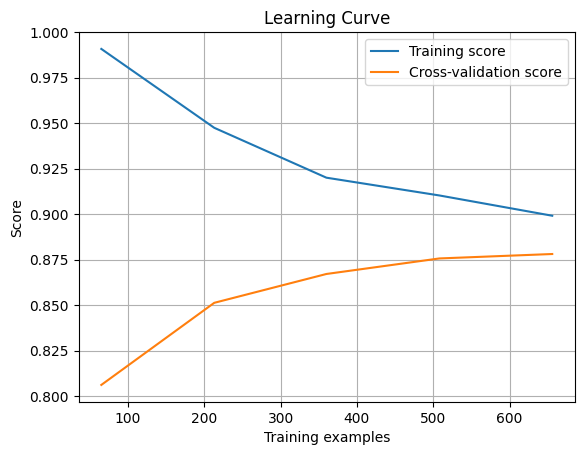

In [185]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define function to plot learning curves
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(model, Xtrain, Ytrain, cv=5)


In [186]:
X2 = df[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']]
y2 = df['target']

In [187]:
X3 = df[['cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']]
y3 = df['target']

In [188]:
X4 = df[['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
y4 = df['target']

In [197]:
Xtrain2,Xtest2,Ytrain2,Ytest2=train_test_split(X2,y2,test_size=0.2)
Xtrain3,Xtest3,Ytrain3,Ytest3=train_test_split(X3,y3,test_size=0.2)
Xtrain4,Xtest4,Ytrain4,Ytest4=train_test_split(X4,y4,test_size=0.2)

In [201]:
model.fit(Xtrain2,Ytrain2)




Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('RandomForestClassifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=5))])

In [202]:
y_pred1 = model.predict(Xtest2)

# Metrics
accuracy = accuracy_score(Ytest2, y_pred1)
precision = precision_score(Ytest2, y_pred1)
recall = recall_score(Ytest2, y_pred1)
f1 = f1_score(Ytest2, y_pred1)
print('selector 2')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

selector 2
Accuracy: 0.9073170731707317
Precision: 0.8727272727272727
Recall: 0.9504950495049505
F1 Score: 0.909952606635071


In [203]:
cv_results = cross_validate(model, X2, y2, cv=5, 
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                            return_train_score=False)

print(f"Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Precision Scores: {cv_results['test_precision_weighted']}")
print(f"Recall Scores: {cv_results['test_recall_weighted']}")
print(f"F1 Scores: {cv_results['test_f1_weighted']}")

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Mean Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Mean Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"Mean F1 Score: {cv_results['test_f1_weighted'].mean()}")

Accuracy Scores: [0.92 0.88 0.92 0.88 0.84]
Precision Scores: [0.92 0.88 0.93 0.89 0.85]
Recall Scores: [0.92 0.88 0.92 0.88 0.84]
F1 Scores: [0.92 0.88 0.92 0.88 0.84]
Mean Accuracy: 0.8897560975609757
Mean Precision: 0.8947224611056697
Mean Recall: 0.8897560975609757
Mean F1 Score: 0.889168980211901


In [ ]:
y_pred = model.predict(Xtest)

# Metrics
accuracy = accuracy_score(Ytest2, y_pred)
precision = precision_score(Ytest2, y_pred, )
recall = recall_score(Ytest2,y_pred )
f1 = f1_score(Ytest2, y_pred, )
print('selector 2')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
cv_results = cross_validate(model, X2, y2, cv=5, 
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                            return_train_score=False)

print(f"Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Precision Scores: {cv_results['test_precision_weighted']}")
print(f"Recall Scores: {cv_results['test_recall_weighted']}")
print(f"F1 Scores: {cv_results['test_f1_weighted']}")

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Mean Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Mean Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"Mean F1 Score: {cv_results['test_f1_weighted'].mean()}")